# Первичный анализ данных

### Для начала импортируем необходимые для анализа библиотеки и датасет:

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок


studying = pd.read_csv('stud_math.csv')
studying = studying[studying['score'].notnull()] # удаляем все строки, где отсутствует значение целевой переменной ('score')

## Предобработка

In [273]:
# Определим функцию, которая заменяет значения nan на None: 

def none_function(column, data=studying): 
    data[column] = data[column].astype(str).apply(lambda x: None if x.strip() =='' else x)
    return data[column]

# Для уменьшения кода выпишем функцию count_values, которая считает количество уникальных значений по отдельным столбцам: 

def count_values(column_name, data=studying): 
    return data[column_name].value_counts()

# Функция интерквартильного размаха: 
def iqr_condition(column, condition, value, data=studying):
    cond_data = data[data[condition]==value]
    IQR = cond_data[column].quantile(0.75) - cond_data[column].quantile(0.25) #Интерквартильный размах
    perc25 = cond_data[column].quantile(0.25)
    perc75 = cond_data[column].quantile(0.75)
 
    return print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

def iqr(column, data=studying):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25) #Интерквартильный размах
    perc25 = data[column].quantile(0.25)
    perc75 = data[column].quantile(0.75)
 
    return print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

### Посмотрим на данные и информацию о них: 

In [274]:
display(studying)
studying.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

### По результатам в колонке Non-Null Count видно, что количество ненулевых значений в разных столбцах отличается, а значит необходимо сначала данные очистить. 
### Также, понятно что в датасете 13 числовых и 17 строковых столбцов

### Проанализируем каждый столбец отдельно:

In [275]:
# Подсчитаем количество уникальных значений школ. По результатам их всего 2 - GP и MS. 
none_function('school')
count_values('school')

GP    344
MS     45
Name: school, dtype: int64

#### Как видим, у нас всего две школы - GP и MS, данные полные

### Посмотрим, влияет ли школа обучения на финальную оценку:

<AxesSubplot:xlabel='school', ylabel='score'>

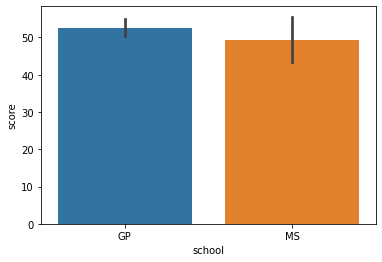

In [276]:
studying['score'] = studying['score'].astype(float)
sns.barplot(x='school', y='score', data=studying)

#### Как видим, в среднем в школе GP успеваемость лишь немного лучше, чем в школе MS. 

## Рассмотрим также влияет ли пол на успеваемость: 

In [277]:
none_function('sex')
count_values('sex')

F    204
M    185
Name: sex, dtype: int64

### Количество учащихся девочек и мальчиков почти одинаковое, но девочек немного больше. Данные полные. 

<AxesSubplot:xlabel='sex', ylabel='score'>

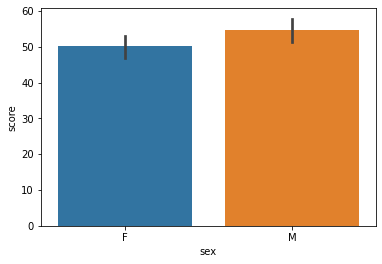

In [278]:
sns.barplot(x='sex', y='score', data=studying)

### По распределению успеваемости видим, что мальчики в среднем учатся лучше, чем девочки.

## Теперь посмотрим как влияет возраст ученика на оценку:

In [279]:
count_values('age')

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

<AxesSubplot:>

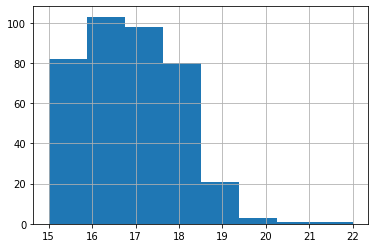

In [280]:
# Как видим по гистограмме, количество учеников старше 19 лет очень мало, что может быть связано с тем, что в таком возрасте 
# многие идут работать, а не учиться. 
studying.age.hist(bins=8)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


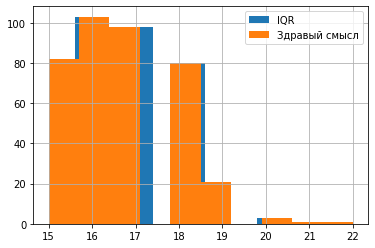

In [281]:
#Посмотрим на выбросы: 
IQR = studying.age.quantile(0.75) - studying.age.quantile(0.25) #Интерквартильный размах
perc25 = studying.age.quantile(0.25)
perc75 = studying.age.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
studying.age.loc[studying.age.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(label = 'IQR')
 
studying.age.loc[studying.age <= 100].hist(label = 'Здравый смысл')
 
plt.legend();

#### По результатам интерквартильного размаха понятно, что возраст 21-22 является выбросом, так как границей выбросов является возраст 21. Но в данном случае это значение можно не считать аномальным, и оставить его для анализа.

### Рассмотрим влияние возраста ученика на его оценку: 

<AxesSubplot:xlabel='age', ylabel='score'>

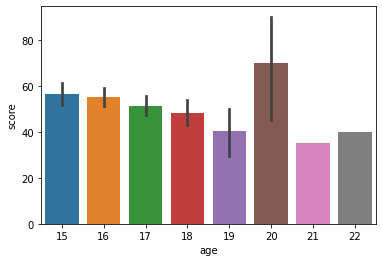

In [282]:
sns.barplot(x='age', y='score', data=studying)

### Получился достаточно интересный результат. Средняя успеваемость с возрастом снижается, но в возрасте 20 лет успеваемость аномально высокая, что может свидетельствовать об уникальности учеников, наличии выбросов или других факторах. Стоит рассмотреть значения подробнее.

In [283]:
studying[studying['age']==20].score

306    90.0
376    75.0
390    45.0
Name: score, dtype: float64

### Как видим, никаких аномалий в оценках учеников в возрасте 20 лет нету, что свидетельствует о том, что проблем с выбросами здесь нет. Рассмотрим, какие причины могут провоцировать снижение оценок учеников возраста до 20 лет: 

In [284]:
studying.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

### Как видим, в датасете присутствуют целых 37 (!!) нулевых значений целевой переменной, которые могут искажать результат успеваемости. Посмотрим на их количество по разным возрастам: 

In [285]:
studying[studying['score']==0].age.value_counts()

18    11
17     8
16     7
15     6
19     5
Name: age, dtype: int64

### Как видим, с возрастом количество нулевых оценок увеличивается, возможно, по причине увеличения пропусков. 

# Рассмотрим распределение пропусков по возрасту:

<AxesSubplot:xlabel='age', ylabel='absences'>

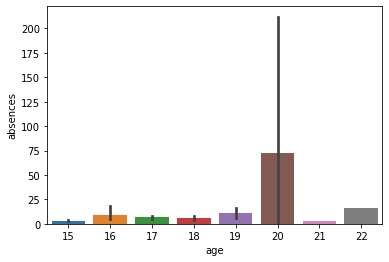

In [286]:
sns.barplot(x='age', y='absences', data=studying)

### Весьма удивительно, но именно у учеников 20 лет, у которых самая высокая успеваемость, в среднем самое высокое количество пропусков. Это дает право подозревать, что в пропусках есть выбросы, рассмотрим их более подробно.

<AxesSubplot:xlabel='age', ylabel='absences'>

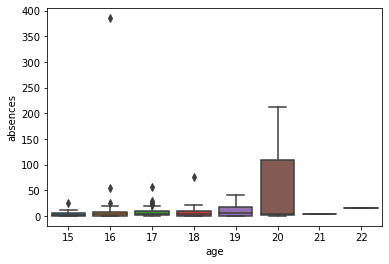

In [287]:
sns.boxplot(x='age', y='absences', data=studying)

### Учитывая, что учеников возраста 20 лет всего трое, выбросов в их значении как раз нету, потому что статистически их неоткуда брать. Тем не менее, такое высокое значение пропусков является скорее исключением из правил, чем правилом, поэтому я думаю, что для дальнейшего анализа это значение лучше все-таки преобразовать либо исключить из датасета. 

In [288]:
# Посмотрим на значения показателей для учеников 20 лет, в особенности интересуют колонки 'absences' и 'score'
studying[studying['age']==20]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
306,GP,M,20,U,GT3,A,3.0,2.0,services,other,course,other,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,5.0,5.0,3.0,5.0,0.0,90.0
376,MS,F,20,NaN,GT3,T,4.0,2.0,health,other,course,NaN,2.0,3.0,2.0,no,yes,yes,no,no,-9.0,yes,yes,yes,5.0,4.0,3.0,3.0,4.0,75.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


### У ученика с 212 пропусками оценка составляет 45 баллов. Допустим, что произошла опечатка, и на самом деле количество пропусков не 212, а 21, и заменим значение: 

In [289]:
studying['absences']=studying['absences'].replace(212.0, 21.0)

<AxesSubplot:xlabel='age', ylabel='absences'>

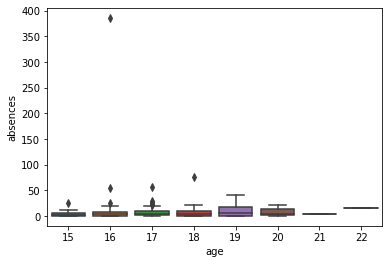

In [290]:
sns.boxplot(x='age', y='absences', data=studying)

### Как видим, ситуация улучшилась. Поскольку мы уже видим выбросы в количестве пропусков для других возрастов, рассмотрим их тоже: 

In [291]:
studying[studying['absences']>50]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0


### Наиболее аномальное значение пропусков во всем датасете - 385. Звучит весьма нереалистично, особенно учитывая тот факт, что это число больше, чем количество дней в году. Учитывая, что у этого ученика высокий балл (85), допустим, что количество пропусков у него равно верхней границе интерквартильного размаха, и заменим это значение.

In [292]:
# Ищем границы выбросов интерквартильного размаха для возраста 16 лет:
iqr_condition('absences', 'age', 16)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


### Верхняя граница выбросов равна 20, поэтому заменим значение 385 на 20: 

In [293]:
studying['absences']=studying['absences'].replace(385.0, 20.0)
studying[studying['absences']>50]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0


<AxesSubplot:xlabel='age', ylabel='absences'>

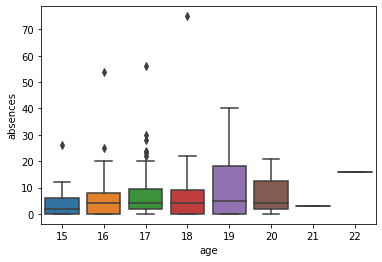

In [294]:
sns.boxplot(x='age', y='absences', data=studying)

### Посмотрим на значения пропусков безотносительно каких-либо факторов: 

<AxesSubplot:xlabel='absences'>

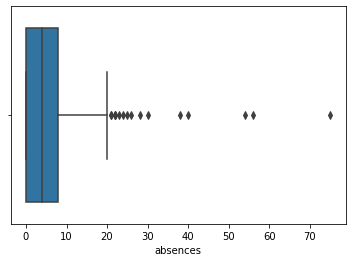

In [295]:
sns.boxplot(x='absences', data=studying)

### Как видим, верхняя граница выбросов составляет 20 пропусков, но пока оставим эти данные как есть, возможно они будут полезны в целом для анализа, вернемся к этому вопросу позже

## Двигаемся дальше. Рассмотрим как адрес (местность проживания) влияет на успеваемость: 

In [296]:
none_function('address')
count_values('address') 

U      291
R       83
nan     15
Name: address, dtype: int64

#### Как видим, присутствуют значения, которые мы не сможем пока заполнить. Большинство учащихся живут в городе, значит можно допустить, что данное значение можно будет вычислить по количеству времени, которое ученики тратят на дорогу 

## Посмотрим на распределение: 

<AxesSubplot:xlabel='address', ylabel='score'>

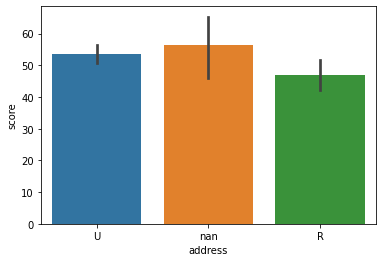

In [297]:
sns.barplot(x='address', y='score', data=studying)

### Как видим, успеваемость учеников из городской местности немного выше, чем учеников сельской местности, но стоит понимать, что по 15 ученикам информация отсутствует. 

### Попробуем посмотреть на распределение количества времени, которое учащиеся тратят на дорогу, возможно это даст нам понять каким образом можно заполнить пропуски по адресам. 

In [298]:
none_function('traveltime')
count_values('traveltime')

1.0    239
2.0     94
nan     28
3.0     21
4.0      7
Name: traveltime, dtype: int64

<AxesSubplot:xlabel='traveltime', ylabel='score'>

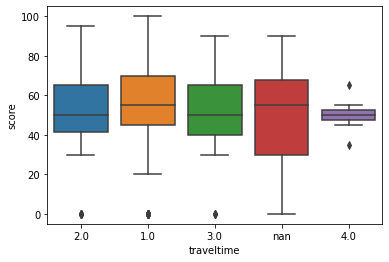

In [299]:
sns.boxplot(x='traveltime', y='score', data=studying)

## На первый взгляд, коробки с усами для расстояния 1,2, 3 выглядят похоже. Выделяется распределение для признака с отсутствующими значениями и распределение для расстояния 4. 
## Посмотрим на график зависимости успеваемости от времени, которое ученики тратят на дорогу

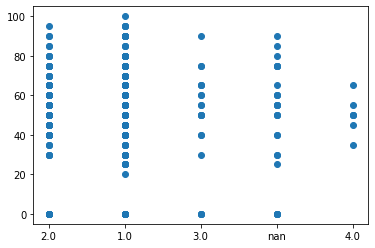

In [300]:
plt.scatter('traveltime', 'score', data=studying)

## Нетрудно заметить, что наиболее информативным показателем является показатель расстояния, равный 4, поскольку значений в нем мало, и их разброс не очень большой. Можно вынести этот показатель как отдельный признак, но возможно, что nan-значения относятся именно к нему. В таком случае этот показатель тоже нельзя будет считать информативным. 
## Проверим, нельзя ли заполнить пропуски при помощи информации по адресам: 

In [301]:
studying[studying['traveltime']=='1.0'].address.value_counts()

U      198
R       34
nan      7
Name: address, dtype: int64

### Большинство значений для расстояния 1 - Urban, поэтому значения nan в поле адрес для этого расстояния мы заменим на 'U': 

In [305]:
studying.loc[(studying['address']=='nan') & (studying['traveltime']=='1.0'), 'address']='U'
studying[studying['traveltime']=='1.0'].address.value_counts() #Проверка

U    205
R     34
Name: address, dtype: int64

In [306]:
# Делаем то же самое для расстояния 2.0
studying[studying['traveltime']=='2.0'].address.value_counts()

U      63
R      26
nan     5
Name: address, dtype: int64

### Большинство значений для расстояния 2 - Urban, поэтому значения nan в поле адрес для этого расстояния мы тоже заменим на 'U': 

In [308]:
studying.loc[(studying['address']=='nan') & (studying['traveltime']=='2.0'), 'address']='U'
studying[studying['traveltime']=='2.0'].address.value_counts() #Проверка

U    68
R    26
Name: address, dtype: int64

##  Делаем то же самое для адресов с расстоянием 3 и 4. Как видно ниже, пустых значений для них нету

In [229]:
studying[studying['traveltime']=='3.0'].address.value_counts()

R    12
U     9
Name: address, dtype: int64

In [230]:
studying[studying['traveltime']=='4.0'].address.value_counts()

R    4
U    3
Name: address, dtype: int64

## Проверим адреса для расстояний, которые не указаны (nan-значения). Видим ниже, что большинство - это городские адреса, поэтому заменим nan-значения городских адресов на 'U' (их всего 3): 

In [231]:
studying[studying['traveltime']=='nan'].address.value_counts()

U      18
R       7
nan     3
Name: address, dtype: int64

In [311]:
studying.loc[(studying['address']=='nan') & (studying['traveltime']=='nan'), 'address']='U'
studying[studying['traveltime']=='nan'].address.value_counts() # Проверка


U    21
R     7
Name: address, dtype: int64

## Посмотрим снова на распределение оценок в зависимости от места проживания: 


<AxesSubplot:xlabel='address', ylabel='score'>

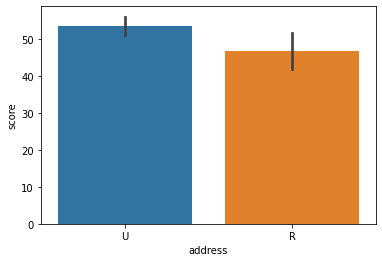

In [312]:
sns.barplot(x='address', y='score', data=studying)

###  Как видим, ситуация почти не изменилась, но оставим эту переменную для дальнейшего анализа

## Попробуем заполнить пропуски переменной traveltime: 

In [315]:
studying[studying['traveltime']=='nan'].address.value_counts()

U    21
R     7
Name: address, dtype: int64

### По предыдущему анализу можно сделать выводы, что большинство адресов Urban имеют расстояние 1 или 2, в то время как большинство адресов Rural имеют расстояния 3 или 4. Поэтому все nan-расстояния с адресом Urban мы заменим на значение 1.0, а все nan-расстояния со значением местности Rural мы заменим на значения 4.0. 

In [317]:
studying.loc[(studying['address']=='U') & (studying['traveltime']=='nan'), 'traveltime']='1.0'
studying.loc[(studying['address']=='R') & (studying['traveltime']=='nan'), 'traveltime']='4.0'

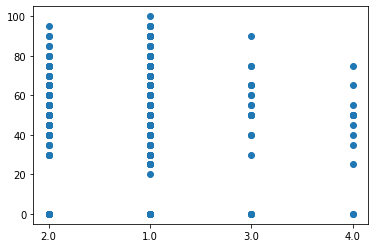

In [319]:
plt.scatter('traveltime', 'score', data=studying)

<AxesSubplot:xlabel='traveltime', ylabel='score'>

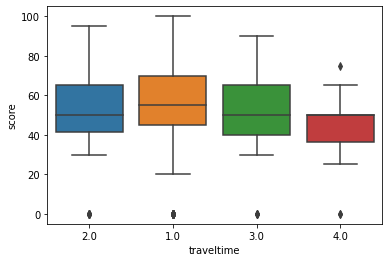

In [320]:
sns.boxplot(x='traveltime', y='score', data=studying)

## По графиках выше видно, что после "восстановления" отсутствующих значений признаки стали более информативными. Например, сейчас явно можно заметить спадную тенденцию в значениях оценок при увеличении расстояния, которое ученики тратят на дорогу - при условии, что им нужно дольше добираться до школы, их медианные оценки ухудшаются. Поэтому признак traveltime оставим для дальнейшего анализа и включения его в модель


### Далее рассмотрим состав семьи учеников (GT3 - больше 3 человек, LE3 - меньше 3 человек): 

In [396]:
none_function('famsize')
count_values('famsize')

GT3    255
LE3    107
nan     27
Name: famsize, dtype: int64

#### В результате видим, что 27 значений в колонке размера семьи являются пустыми. На данный момент заполнить пропуски не представляется возможным. Количество неполных семей в два раза меньше, чем полных. 

### Теперь рассмотрим, вместе ли живут родители учеников (T - вместе, А - раздельно): 

In [397]:
none_function('Pstatus')
count_values('Pstatus')

T      308
nan     45
A       36
Name: Pstatus, dtype: int64

#### Как видим, количество пропущенных значений для данного показателя больше, чем для показателя 'famsize', но можно попробовать заполнить некоторые пропуски. 

## Для заполнения пропусков в предыдущих переменных могут быть полезными переменные Mjob, Fjob, guardian. Рассмотрим каждую из них: 

In [323]:
none_function('Mjob')
count_values('Mjob')

other       127
services     98
at_home      58
teacher      55
health       32
nan          19
Name: Mjob, dtype: int64

In [324]:
none_function('Fjob')
count_values('Fjob')

other       194
services     99
nan          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [325]:
none_function('guardian')
count_values('guardian')

mother    248
father     86
nan        31
other      24
Name: guardian, dtype: int64

## В каждой из перечисленных переменных присутствуют от 19 до 36 nan-значений. Попробуем заполнить пропуски

In [386]:
studying[(studying['famsize']=='LE3') & (studying['Pstatus']=='T')].Mjob.value_counts()

other       25
services    22
teacher     13
at_home     12
health       8
nan          1
Name: Mjob, dtype: int64

In [384]:
studying[(studying['famsize']=='GT3') & (studying['Pstatus']=='A')].Fjob.value_counts()

other       10
services     4
teacher      2
nan          2
at_home      1
health       1
Name: Fjob, dtype: int64

## В семьях, где родители живут и вместе, и отдельно в большинстве случаев опекуном является мама, независимо от того, где она работает. Поэтому пропуски в столбце guardian просто заменим на mother (я пробовала много вариантов, но ничего особенного не нашла, по всем из них пропуски можно заполнить mother)

In [380]:
studying.loc[studying['guardian']=='nan', 'guardian']='mother'
studying.guardian.value_counts() # Проверка

mother    279
father     86
other      24
Name: guardian, dtype: int64

## Также, были рассмотрены разные комбинации переменных famsize, Pstatus, Fjob, Mjob. Для каждого варианта большинство значений для Mjob и Fjob - other, как и для общего случая (без учета других факторов). Поэтому nan-значения для переменных Fjob и Mjob будут заменены на other (в принципе, other мы тоже не особо можем интерпретировать)


In [395]:
studying.loc[studying['Mjob']=='nan', 'Mjob']='other' # Заменяем nan-значения в Mjob на other
studying.loc[studying['Fjob']=='nan', 'Fjob']='other' # Заменяем nan-значения в Fjob на other

## Теперь поработаем над пропусками в Famsize и Pstatus: 

In [407]:
studying[studying['famsize']=='LE3'].Pstatus.value_counts()

T      81
A      13
nan    13
Name: Pstatus, dtype: int64

In [408]:
studying[studying['famsize']=='GT3'].Pstatus.value_counts()

T      207
nan     28
A       20
Name: Pstatus, dtype: int64

## Как видим, независимо от размера семьи, в большинстве случаев Pstatus равен Т, поэтому заменим отсутствующие значения в Pstatus на Т 

In [411]:
studying.loc[studying['Pstatus']=='nan', 'Pstatus']='T'
count_values('Pstatus') # Проверка

T    353
A     36
Name: Pstatus, dtype: int64

## То же самое касается и famsize: независимо от того, вместе или раздельно живут родители, в большинстве случаев размер семьи составляет больше трех человек. Таким образом, заменим nan-значения в столбце famsize на GT3

In [415]:
studying[studying['Pstatus']=='A'].famsize.value_counts()

GT3    20
LE3    13
nan     3
Name: famsize, dtype: int64

In [416]:
studying[studying['Pstatus']=='T'].famsize.value_counts()

GT3    235
LE3     94
nan     24
Name: famsize, dtype: int64

In [418]:
studying.loc[studying['famsize']=='nan', 'famsize']='GT3'
count_values('famsize') # Проверка

GT3    282
LE3    107
Name: famsize, dtype: int64

## Теперь рассмотрим переменные Medu и Fedu: 
        

In [419]:
none_function('Medu')
count_values('Medu')

4.0    131
2.0    100
3.0     96
1.0     56
nan      3
0.0      3
Name: Medu, dtype: int64

In [421]:
studying[studying['Medu']=='nan'].Mjob # Проверяем тип работы мамы при условии nan-значения Medu

92        other
193    services
239       other
Name: Mjob, dtype: object

In [430]:
studying[(studying['Mjob']=='other') | (studying['Mjob']=='services')].Medu.value_counts() 
# Для работы other или services наиболее частое значение Medu - 3.0

3.0    80
2.0    77
4.0    53
1.0    30
nan     3
0.0     1
Name: Medu, dtype: int64

In [434]:
# Заменим nan-значения Medu на 3.0: 
studying.loc[studying['Medu']=='nan', 'Medu']='3.0'
count_values('Medu') # Проверка

4.0    131
2.0    100
3.0     99
1.0     56
0.0      3
Name: Medu, dtype: int64

In [420]:
none_function('Fedu')
count_values('Fedu')

2.0     105
3.0      94
4.0      88
1.0      75
nan      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [435]:
studying[studying['Fedu']=='nan'].Fjob.value_counts()

other       9
services    8
teacher     3
at_home     2
health      2
Name: Fjob, dtype: int64

### Наиболее часто встречаются два значения типа работы отца при условии, что отсутствуют данные о его образовании - это other и services (как и в случае с мамами). Поэтому заменим nan-значения об уровне обучения, базируясь на этих данных: 

In [436]:
studying[(studying['Fjob']=='other') | (studying['Fjob']=='services')].Fedu.value_counts() 

2.0     98
3.0     87
1.0     71
4.0     53
nan     17
0.0      2
40.0     1
Name: Fedu, dtype: int64

In [439]:
studying.loc[studying['Fedu']=='nan', 'Fedu']='2.0'
count_values('Fedu') # Проверка

2.0     129
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: Fedu, dtype: int64

### Также стоит отметить, что в данных Fedu есть явная опечатка (значение 40), заменим его на 4: 

In [441]:
studying.loc[studying['Fedu']=='40.0', 'Fedu']='4.0'
count_values('Fedu') # Проверка

2.0    129
3.0     94
4.0     89
1.0     75
0.0      2
Name: Fedu, dtype: int64

### Рассмотрим переменную reason, которая объясняет причины выбора конкретной школы

In [445]:
none_function('reason')
count_values('reason')

course        135
reputation    102
home          101
other          34
nan            17
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='score'>

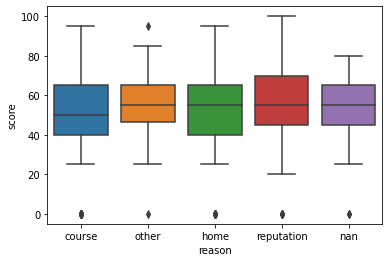

In [448]:
sns.boxplot(x='reason', y='score', data=studying)

## Судя по построенной диаграмме с усами, нельзя сказать что какой-либо из этих признаков является информативным, поскольку медианные значения по всем признакам, кроме course - одинаковы, и сами коробки с усами похожи друг на друга. Попробуем посмотреть на отсутствующие значения. 

### При условии, что главным приоритетом при выборе школы является наполнение программы, стоит посмотреть, хотят ли ученики платить за дополнительные занятия: 

In [463]:
studying[studying['reason']=='course'].paid.value_counts()

no     81
yes    44
Name: paid, dtype: int64

### Как видим, нет. Попробуем заполнить пропуски с учетом этой информации: 

In [485]:
studying[studying['paid']=='no'].reason.value_counts() 

course        93
reputation    46
home          44
other         14
Name: reason, dtype: int64

In [468]:
studying.loc[(studying['paid']=='no') & (studying['reason']=='nan'), 'reason']='course'
studying.reason.value_counts()

course        147
reputation    102
home          101
other          34
nan             5
Name: reason, dtype: int64

### Теперь посмотрим, какие категории учеников готовы заплатить за дополнительное обучение: 

In [475]:
studying[studying['paid']=='yes'].reason.value_counts()

home          49
course        44
reputation    44
other         12
nan            4
Name: reason, dtype: int64

### Как видим, распределение почти равномерно между группами home, course и reputation, но именно для категории home количество студентов, готовых заплатить за дополнительные уроки является большим, чем тех, кто не готов. Заполним соответственно пропуски: 

In [476]:
studying[studying['reason']=='home'].paid.value_counts()

yes    49
no     44
Name: paid, dtype: int64

In [477]:
studying[studying['reason']=='reputation'].paid.value_counts()

no     46
yes    44
Name: paid, dtype: int64

In [479]:
studying.loc[(studying['traveltime']=='1.0') & (studying['reason']=='nan'), 'reason']='home'
count_values('reason')

course        147
home          106
reputation    102
other          34
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='score'>

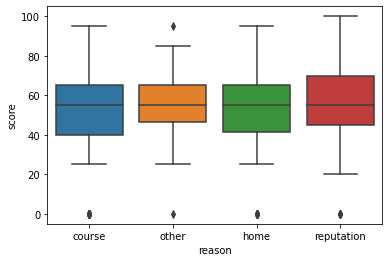

In [480]:
sns.boxplot(x='reason', y='score', data=studying)

### Теперь с уверенностью можно сказать, что данный признак не является информативным, поэтому его можно не брать во внимание для последующего анализа. Все коробки с усами очень похожи, поэтому мы не будем рассматривать показатель причины выбора школы

## Рассмотрим фактор Studytime - уж он точно должен влиять на успеваемость по математике!

In [12]:
none_function('studytime')
count_values('studytime')

2.0    189
1.0    103
3.0     63
4.0     27
nan      7
Name: studytime, dtype: int64

In [483]:
# Пропущенных значений 7, заменим их на наиболее часто встречающееся: 
studying.loc[studying['studytime']=='nan', 'studytime']='2.0'

### Посмотрим как количество времени, посвященного учебе влияет на успеваемость: 

<AxesSubplot:xlabel='studytime', ylabel='score'>

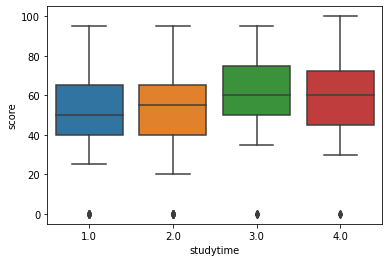

In [484]:
sns.boxplot(x='studytime', y='score', data=studying)

## Как видим, количество времени, которое ученики посвящают учебе, имеет влияние на успеваемость! При чем наиболее заметна разница у тех, кто посвящает в среднем 5-10 часов на обучение в неделю.

In [13]:
none_function('failures')
count_values('failures')

0.0    290
1.0     48
nan     22
2.0     15
3.0     14
Name: failures, dtype: int64

In [14]:
none_function('schoolsup')
count_values('schoolsup')

no     331
yes     49
nan      9
Name: schoolsup, dtype: int64

In [15]:
none_function('famsup')
count_values('famsup')

yes    216
no     135
nan     38
Name: famsup, dtype: int64

In [16]:
none_function('paid')
count_values('paid')

no     197
yes    153
nan     39
Name: paid, dtype: int64

In [17]:
none_function('activities')
count_values('activities')

yes    192
no     183
nan     14
Name: activities, dtype: int64

In [18]:
none_function('nursery')
count_values('nursery')

yes    297
no      77
nan     15
Name: nursery, dtype: int64

In [19]:
none_function('studytime, granular')
count_values('studytime, granular')

-6.0     189
-3.0     103
-9.0      63
-12.0     27
nan        7
Name: studytime, granular, dtype: int64

In [20]:
none_function('higher')
count_values('higher')

yes    350
nan     20
no      19
Name: higher, dtype: int64

In [21]:
none_function('internet')
count_values('internet')

yes    300
no      55
nan     34
Name: internet, dtype: int64

In [22]:
none_function('romantic')
count_values('romantic')

no     235
yes    123
nan     31
Name: romantic, dtype: int64

In [23]:
none_function('famrel')
count_values('famrel')

4.0     178
5.0      97
3.0      62
nan      27
2.0      17
1.0       7
-1.0      1
Name: famrel, dtype: int64

In [24]:
none_function('freetime')
count_values('freetime')

3.0    152
4.0    110
2.0     63
5.0     37
1.0     18
nan      9
Name: freetime, dtype: int64

In [25]:
none_function('goout')
count_values('goout')

3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
nan      7
Name: goout, dtype: int64

In [26]:
none_function('health')
count_values('health')

5.0    137
3.0     88
4.0     60
1.0     47
2.0     42
nan     15
Name: health, dtype: int64

In [27]:
none_function('absences')
count_values('absences')

0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
14.0      12
12.0      12
nan       11
16.0       7
3.0        7
7.0        6
18.0       5
5.0        5
20.0       4
1.0        3
9.0        3
22.0       3
15.0       2
11.0       2
13.0       2
30.0       1
40.0       1
17.0       1
54.0       1
212.0      1
19.0       1
56.0       1
28.0       1
75.0       1
26.0       1
38.0       1
24.0       1
21.0       1
25.0       1
23.0       1
385.0      1
Name: absences, dtype: int64

### Величина 'score' является целевой переменной, в которой недопустимы пропуски, поэтому отсутствующие строки в ней мы сразу удалим.

In [28]:
none_function('score')
count_values('score')


50.0     54
55.0     46
0.0      37
75.0     33
60.0     31
65.0     31
40.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64